In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.metrics import make_scorer,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por-modelling-RFE-range_G3_5-repaired_G3_0_values.pkl')

df_por.head()

,school,sex,studytime,schoolsup,paid,higher,internet,romantic,absences,Mjob_health,Mjob_teacher,Fjob_at_home,Fjob_teacher,reason_course,reason_other,G3
0,1,1,2,1,0,1,0,0,2,0,0,0,1,1,0,3
1,1,1,2,0,0,1,1,0,2,0,0,0,0,1,0,3
2,1,1,2,1,0,1,1,0,1,0,0,0,0,0,1,3
3,1,1,3,0,0,1,1,1,2,1,0,0,0,0,0,4
4,1,1,2,0,0,1,0,0,2,0,0,0,0,0,0,4


In [3]:
df_por.shape

(649, 16)

In [4]:
X = np.array(df_por.drop('G3',axis = 1))
y = np.array(df_por['G3'])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Linear Regression 

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pred = model.predict(X_test)

In [8]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.679493,5
1,3.729425,3
2,3.866689,5
3,3.049549,3
4,3.376152,3


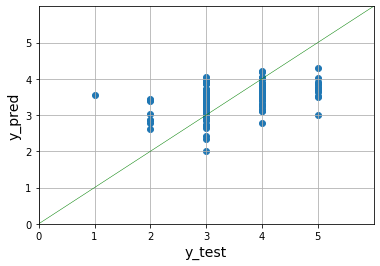

In [9]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [10]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [11]:
rmse(y_pred,y_test)

0.7015528827283138

## Decision Tree Regression

In [12]:
rmse_scorer = make_scorer(rmse,greater_is_better = False)

In [13]:
param_grid = {'min_samples_leaf':[1,5,10,20,50,100],'max_depth':[1,2,5,10,20,30,50]}

grid_search_cv = GridSearchCV(estimator = DecisionTreeRegressor(),param_grid = param_grid,cv=5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100]},
             pre_di

In [14]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [15]:
y_pred = grid_search_cv.predict(X_test)

In [16]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.153333,5
1,3.599359,3
2,3.153333,5
3,3.153333,3
4,3.599359,3


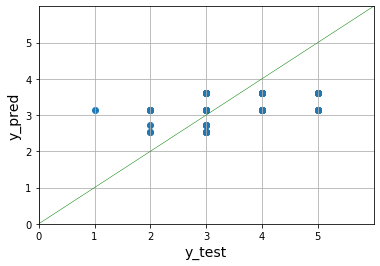

In [17]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [18]:
rmse(y_pred,y_test)

0.7530988167446169

## Random Forest Regression

In [19]:
param_grid = {'min_samples_leaf':[1,10,50],'max_depth':[1,5,30],'n_estimators':[10,50,100]}

grid_search_cv = GridSearchCV(estimator = RandomForestRegressor(),param_grid = param_grid,cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [20]:
grid_search_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
y_pred = grid_search_cv.predict(X_test)

In [22]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.220730,5
1,3.736887,3
2,3.365555,5
3,3.055988,3
4,3.434906,3


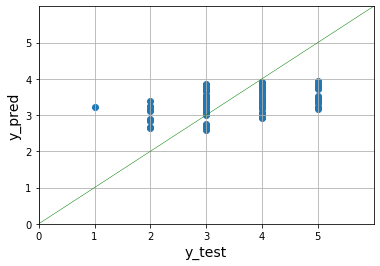

In [23]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [24]:
rmse(y_pred,y_test)

0.7364101476069883

## XGBoost 

In [25]:
parameters = {'max_depth':[1,5,30],'learning_rate':[0.01,0.1,0.3],'n_estimators':[10,50,100],'objective':'reg:squarederror'}

grid_search_cv = GridSearchCV(estimator = xgboost.XGBRegressor(silent = True),param_grid = param_grid,
                              cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 30],
                         'min_samples_leaf': [1, 10, 50],
                        

In [26]:
grid_search_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, min_samples_leaf=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1, verbosity=1)

In [27]:
y_pred = grid_search_cv.predict(X_test)

In [28]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.377187,5
1,3.636154,3
2,3.464963,5
3,3.208647,3
4,3.464526,3


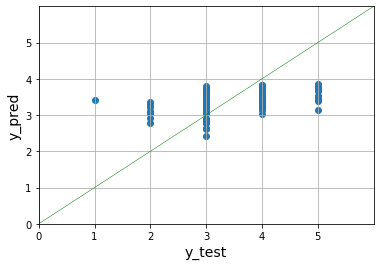

In [29]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [30]:
rmse(y_pred,y_test)

0.7214607712456146

## Neural Network 

In [31]:
sc = MinMaxScaler()

In [32]:
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_train.shape

(519, 15)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [36]:
model.fit(X_train,y_train,validation_data = (X_test,y_test.values),batch_size = 64,epochs = 250)

Train on 519 samples, validate on 130 samples
Epoch 1/250
519/519 [==============================] - 1s 2ms/sample - loss: 12.3812 - val_loss: 11.6399
Epoch 2/250
519/519 [==============================] - 0s 87us/sample - loss: 10.5113 - val_loss: 9.9719
Epoch 3/250
519/519 [==============================] - 0s 75us/sample - loss: 8.6739 - val_loss: 7.5582
Epoch 4/250
519/519 [==============================] - 0s 69us/sample - loss: 5.8948 - val_loss: 4.2609
Epoch 5/250
519/519 [==============================] - 0s 67us/sample - loss: 3.2089 - val_loss: 1.4598
Epoch 6/250
519/519 [==============================] - 0s 66us/sample - loss: 2.6095 - val_loss: 0.9443
Epoch 7/250
519/519 [==============================] - 0s 75us/sample - loss: 2.5430 - val_loss: 1.1785
Epoch 8/250
519/519 [==============================] - 0s 66us/sample - loss: 2.0805 - val_loss: 1.6665
Epoch 9/250
519/519 [==============================] - 0s 67us/sample - loss: 2.0653 - val_loss: 1.3309
Epoch 10/250
519

519/519 [==============================] - 0s 67us/sample - loss: 0.7609 - val_loss: 0.6908
Epoch 79/250
519/519 [==============================] - 0s 62us/sample - loss: 0.8709 - val_loss: 0.7351
Epoch 80/250
519/519 [==============================] - 0s 62us/sample - loss: 0.8866 - val_loss: 0.7705
Epoch 81/250
519/519 [==============================] - 0s 66us/sample - loss: 0.9706 - val_loss: 0.6221
Epoch 82/250
519/519 [==============================] - 0s 60us/sample - loss: 0.9198 - val_loss: 0.7455
Epoch 83/250
519/519 [==============================] - 0s 60us/sample - loss: 0.8797 - val_loss: 0.6915
Epoch 84/250
519/519 [==============================] - 0s 62us/sample - loss: 0.8744 - val_loss: 0.6916
Epoch 85/250
519/519 [==============================] - 0s 64us/sample - loss: 0.8032 - val_loss: 0.7214
Epoch 86/250
519/519 [==============================] - 0s 60us/sample - loss: 0.7496 - val_loss: 0.7309
Epoch 87/250
519/519 [==============================] - 0s 62us/samp

519/519 [==============================] - 0s 66us/sample - loss: 0.7699 - val_loss: 0.5567
Epoch 156/250
519/519 [==============================] - 0s 67us/sample - loss: 0.7087 - val_loss: 0.5976
Epoch 157/250
519/519 [==============================] - 0s 62us/sample - loss: 0.7108 - val_loss: 0.6199
Epoch 158/250
519/519 [==============================] - 0s 69us/sample - loss: 0.7522 - val_loss: 0.6326
Epoch 159/250
519/519 [==============================] - 0s 73us/sample - loss: 0.6847 - val_loss: 0.5963
Epoch 160/250
519/519 [==============================] - 0s 66us/sample - loss: 0.6661 - val_loss: 0.5373
Epoch 161/250
519/519 [==============================] - 0s 66us/sample - loss: 0.7490 - val_loss: 0.5437
Epoch 162/250
519/519 [==============================] - 0s 64us/sample - loss: 0.7576 - val_loss: 0.5796
Epoch 163/250
519/519 [==============================] - 0s 64us/sample - loss: 0.7264 - val_loss: 0.6347
Epoch 164/250
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 66us/sample - loss: 0.6456 - val_loss: 0.5574
Epoch 233/250
519/519 [==============================] - 0s 64us/sample - loss: 0.6519 - val_loss: 0.5643
Epoch 234/250
519/519 [==============================] - 0s 62us/sample - loss: 0.6790 - val_loss: 0.5615
Epoch 235/250
519/519 [==============================] - 0s 62us/sample - loss: 0.6611 - val_loss: 0.5556
Epoch 236/250
519/519 [==============================] - 0s 62us/sample - loss: 0.6167 - val_loss: 0.5602
Epoch 237/250
519/519 [==============================] - 0s 62us/sample - loss: 0.6135 - val_loss: 0.5650
Epoch 238/250
519/519 [==============================] - 0s 64us/sample - loss: 0.6789 - val_loss: 0.5463
Epoch 239/250
519/519 [==============================] - 0s 58us/sample - loss: 0.6372 - val_loss: 0.5388
Epoch 240/250
519/519 [==============================] - 0s 62us/sample - loss: 0.5951 - val_loss: 0.5639
Epoch 241/250
519/519 [==============================] - 0s 

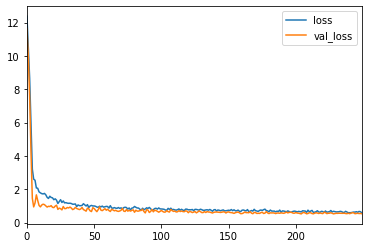

In [37]:
losses = pd.DataFrame(model.history.history)

losses.plot();

In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.509541,5
1,3.381199,3
2,3.598044,5
3,3.221613,3
4,3.151576,3


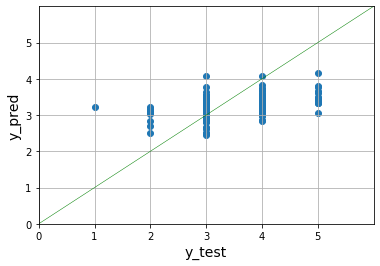

In [40]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [41]:
rmse(y_pred,y_test)

0.7318043777416486

## Stacking 

In [42]:
X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size = 0.5,random_state = 42)

### Base Models 

In [43]:
model = DecisionTreeRegressor(min_samples_leaf = 20,max_depth = 10)
model.fit(X_base,y_base)

y_pred_dt_meta = model.predict(X_meta)
y_pred_dt_test = model.predict(X_test)

In [44]:
model = RandomForestRegressor(min_samples_leaf = 1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_rf_meta = model.predict(X_meta)
y_pred_rf_test = model.predict(X_test)

In [45]:
model = xgboost.XGBRegressor(silent = True,max_depth = 1,learning_rate = 0.1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_xgb_meta = model.predict(X_meta)
y_pred_xgb_test = model.predict(X_test)

In [46]:
model = Sequential()

model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

model.fit(X_train,y_train,validation_data = (X_base,y_base),batch_size = 64,epochs = 250)

Train on 519 samples, validate on 259 samples
Epoch 1/250
519/519 [==============================] - 1s 1ms/sample - loss: 9.4122 - val_loss: 7.9586
Epoch 2/250
519/519 [==============================] - 0s 85us/sample - loss: 6.7779 - val_loss: 4.7895
Epoch 3/250
519/519 [==============================] - 0s 69us/sample - loss: 3.7444 - val_loss: 1.7155
Epoch 4/250
519/519 [==============================] - 0s 75us/sample - loss: 2.4211 - val_loss: 0.8318
Epoch 5/250
519/519 [==============================] - 0s 69us/sample - loss: 2.2717 - val_loss: 0.8315
Epoch 6/250
519/519 [==============================] - 0s 67us/sample - loss: 2.0828 - val_loss: 1.1942
Epoch 7/250
519/519 [==============================] - 0s 77us/sample - loss: 1.9658 - val_loss: 1.0275
Epoch 8/250
519/519 [==============================] - 0s 75us/sample - loss: 1.8011 - val_loss: 0.8496
Epoch 9/250
519/519 [==============================] - 0s 75us/sample - loss: 1.7688 - val_loss: 0.8359
Epoch 10/250
519/51

519/519 [==============================] - 0s 71us/sample - loss: 0.7629 - val_loss: 0.5222
Epoch 79/250
519/519 [==============================] - 0s 71us/sample - loss: 0.7931 - val_loss: 0.6003
Epoch 80/250
519/519 [==============================] - 0s 74us/sample - loss: 0.7868 - val_loss: 0.6049
Epoch 81/250
519/519 [==============================] - 0s 89us/sample - loss: 0.7196 - val_loss: 0.5566
Epoch 82/250
519/519 [==============================] - 0s 75us/sample - loss: 0.7325 - val_loss: 0.5279
Epoch 83/250
519/519 [==============================] - 0s 71us/sample - loss: 0.8751 - val_loss: 0.6350
Epoch 84/250
519/519 [==============================] - 0s 75us/sample - loss: 0.7705 - val_loss: 0.5538
Epoch 85/250
519/519 [==============================] - 0s 75us/sample - loss: 0.7128 - val_loss: 0.5257
Epoch 86/250
519/519 [==============================] - 0s 73us/sample - loss: 0.7502 - val_loss: 0.5561
Epoch 87/250
519/519 [==============================] - 0s 73us/samp

519/519 [==============================] - 0s 69us/sample - loss: 0.6504 - val_loss: 0.4676
Epoch 156/250
519/519 [==============================] - 0s 67us/sample - loss: 0.6888 - val_loss: 0.4527
Epoch 157/250
519/519 [==============================] - 0s 67us/sample - loss: 0.6857 - val_loss: 0.4634
Epoch 158/250
519/519 [==============================] - 0s 67us/sample - loss: 0.6025 - val_loss: 0.4735
Epoch 159/250
519/519 [==============================] - 0s 67us/sample - loss: 0.6713 - val_loss: 0.4670
Epoch 160/250
519/519 [==============================] - 0s 69us/sample - loss: 0.6787 - val_loss: 0.4720
Epoch 161/250
519/519 [==============================] - 0s 69us/sample - loss: 0.6662 - val_loss: 0.4599
Epoch 162/250
519/519 [==============================] - 0s 64us/sample - loss: 0.6720 - val_loss: 0.4732
Epoch 163/250
519/519 [==============================] - 0s 67us/sample - loss: 0.6779 - val_loss: 0.4790
Epoch 164/250
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 73us/sample - loss: 0.6024 - val_loss: 0.4107
Epoch 233/250
519/519 [==============================] - 0s 69us/sample - loss: 0.5950 - val_loss: 0.4235
Epoch 234/250
519/519 [==============================] - 0s 67us/sample - loss: 0.5731 - val_loss: 0.4357
Epoch 235/250
519/519 [==============================] - 0s 69us/sample - loss: 0.5731 - val_loss: 0.4303
Epoch 236/250
519/519 [==============================] - 0s 67us/sample - loss: 0.5904 - val_loss: 0.4379
Epoch 237/250
519/519 [==============================] - 0s 64us/sample - loss: 0.5500 - val_loss: 0.4237
Epoch 238/250
519/519 [==============================] - 0s 66us/sample - loss: 0.6381 - val_loss: 0.4191
Epoch 239/250
519/519 [==============================] - 0s 69us/sample - loss: 0.5936 - val_loss: 0.4330
Epoch 240/250
519/519 [==============================] - 0s 66us/sample - loss: 0.5780 - val_loss: 0.4482
Epoch 241/250
519/519 [==============================] - 0s 

In [47]:
y_pred_nn_meta = model.predict(X_meta)
y_pred_nn_test = model.predict(X_test)

In [48]:
y_pred_dt_meta = pd.DataFrame(y_pred_dt_meta)
y_pred_rf_meta = pd.DataFrame(y_pred_rf_meta)
y_pred_xgb_meta = pd.DataFrame(y_pred_xgb_meta)
y_pred_nn_meta = pd.DataFrame(y_pred_nn_meta)

df_X_meta = pd.concat([y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta],axis = 1)
df_X_meta.columns = ['y_pred_dt_meta','y_pred_rf_meta','y_pred_xgb_meta','y_pred_nn_meta']

df_X_meta.head()

,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta
0,2.892857,3.290500,2.907519,2.669898
1,3.725000,4.018786,3.502569,3.414090
2,3.291667,2.901508,2.962281,3.218750
3,3.769231,3.506000,3.630373,3.341861
4,3.350000,3.921667,3.622243,3.479585


In [49]:
y_pred_dt_test = pd.DataFrame(y_pred_dt_test)
y_pred_rf_test = pd.DataFrame(y_pred_rf_test)
y_pred_xgb_test = pd.DataFrame(y_pred_xgb_test)
y_pred_nn_test = pd.DataFrame(y_pred_nn_test)

df_X_test = pd.concat([y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test],axis = 1)
df_X_test.columns = ['y_pred_dt_test','y_pred_rf_test','y_pred_xgb_test','y_pred_nn_test']

df_X_test.head()

,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test
0,3.090909,2.990000,3.325236,3.734364
1,3.769231,3.971155,3.675190,3.453629
2,3.090909,2.900000,3.370053,3.780558
3,3.090909,2.918000,3.209392,3.381326
4,3.750000,3.034667,3.253415,3.286685


### Meta Model 

In [50]:
model = LinearRegression()
model.fit(df_X_meta,y_meta)

y_pred_test = model.predict(df_X_test)

In [51]:
y_pred_test = pd.DataFrame(y_pred_test)

df_temp = pd.concat([y_pred_test,y_test],axis = 1)
df_temp.columns = ['y_pred_test','y_test']

df_temp.head()

,y_pred_test,y_test
0,4.498158,5
1,3.550216,3
2,4.595404,5
3,3.837060,3
4,3.485592,3


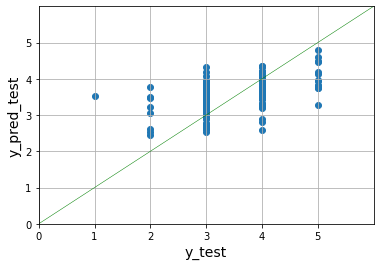

In [52]:
plt.scatter(df_temp['y_test'],df_temp['y_pred_test'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [53]:
rmse(y_pred_test,y_test)

0.6888411935619569

In [54]:
mean_absolute_error(y_pred_test,y_test)

0.536770943376205